In [1]:
############################################################
# Open Connection
############################################################
import json
import ssl
import datetime
from websocket import create_connection
url='ws://rocworks.no-ip.org/winccoa?username=demo&password=demo'
ws = create_connection(url, sslopt={"cert_reqs": ssl.CERT_NONE})

In [2]:
############################################################
# dpGetPeriod
############################################################
cmd={'DpGetPeriod': {
        'Dps':['ExampleDP_Trend1.:_offline.._value', 'ExampleDP_Trend1.:_offline.._status'],
        'T1': (datetime.datetime.now() - datetime.timedelta(minutes=60)).isoformat(), 
        'T2': (datetime.datetime.now() - datetime.timedelta(minutes=0)).isoformat(),
        'Count': 0, # Optional (Default=0)
        'Ts': 4 # Optional (0...no ts in result, 1...ts as ms since epoch, 2...ts as ISO8601)
    }}
ws.send(json.dumps(cmd))
res=json.loads(ws.recv())
print(res)
if "System1:ExampleDP_Trend1.:_offline.._value" in res["DpGetPeriodResult"]["Values"]:
    values=res["DpGetPeriodResult"]["Values"]["System1:ExampleDP_Trend1.:_offline.._value"]
    print(values)
else:
    print("no data found")

{'DpGetPeriodResult': {'Values': {}, 'Error': 0}}
no data found


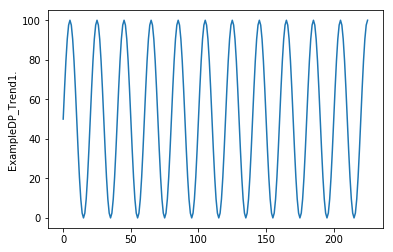

In [6]:
# Plot result of dpGetPeriod
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(values)
plt.ylabel('ExampleDP_Trend1.')
plt.show()

In [3]:
############################################################
# dpGet
############################################################
cmd={'DpGet': {'Dps':['ExampleDP_Trend1.', 'ExampleDP_Trend2.']}}
ws.send(json.dumps(cmd))
res=json.loads(ws.recv())
print(json.dumps(res, indent=4, sort_keys=True))

{
    "DpGetResult": {
        "Error": 0,
        "Values": {
            "System1:ExampleDP_Trend1.:_original.._value": 6.0,
            "System1:ExampleDP_Trend2.:_original.._value": 5.0
        }
    }
}


In [6]:
############################################################
# dpSet
############################################################
from random import randint
cmd={'DpSet': {'Wait': True, 
              'Values':[{'Dp':'ExampleDP_Trend1.','Value': randint(0, 9)}, 
                        {'Dp':'ExampleDP_Trend2.','Value': randint(0, 9)}]}}
ws.send(json.dumps(cmd))
res=json.loads(ws.recv())
print(json.dumps(res, indent=4, sort_keys=True))

{
    "Response": {
        "Code": 0,
        "Message": ""
    }
}


In [3]:
############################################################
# dpConnect
############################################################
from threading import Thread

def read():
    while True:
        res=json.loads(ws.recv())
        print(res)
Thread(target=read).start()
    
cmd={"DpConnect": {"Id": 1, "Dps": ["ExampleDP_Trend1."]}}
ws.send(json.dumps(cmd))

60

{'DpConnectResult': {'Values': {'System1:ExampleDP_Trend1.:_online.._value': 1.0}, 'Error': 0, 'Id': 1}}


In [26]:
import datetime
print((datetime.datetime.now() - datetime.timedelta(hours=1)).isoformat())

2018-02-08T09:11:05.746797
